<a href="https://colab.research.google.com/github/spencer18001/Clustering-And-Dimensionality-Reduction---Deep-Dive/blob/main/06/0615.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install umap-learn umap-learn[plot]
!wget -O 0615_mammoth_3d.json https://github.com/spencer18001/Clustering-And-Dimensionality-Reduction---Deep-Dive/blob/main/data/0615_mammoth_3d.json?raw=1

## Tunning UMAP parameters

In [ ]:
import random

import numpy as np
import pandas as pd

import umap
import umap.plot as uplot

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
random.seed(2) # we want to obtain the same UMAP embeddings each time

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn

In [ ]:
df = pd.read_json("0615_mammoth_3d.json")
df.columns = ['x', 'y', 'z']

In [ ]:
df[['x', 'y', 'z']].to_numpy().max()

568.899

In [ ]:
df.head()

,x,y,z
0,430.826,106.864,24.492
1,397.734,99.293,14.370
2,480.505,80.876,131.561
3,422.736,87.715,13.504
4,414.840,113.363,78.061


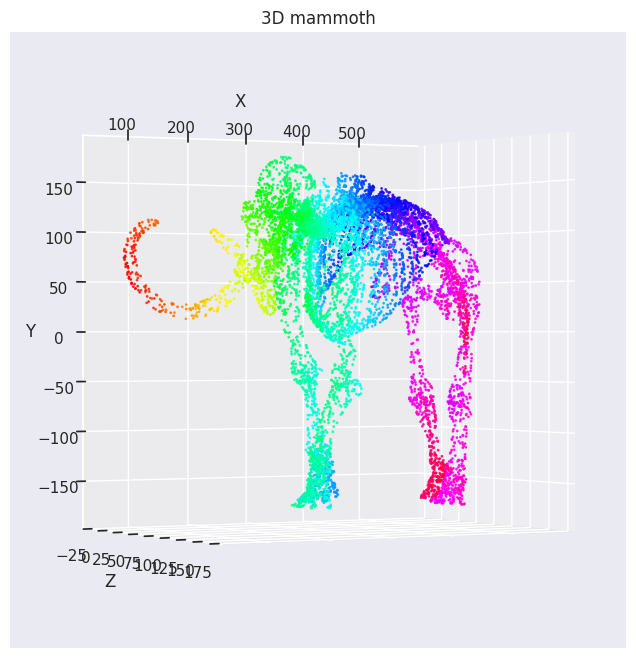

In [ ]:
# color the data points with similar colors if they are near each other in 3D coordinate system

# min-max scale
# Create values for colormap
max_value = df[['x', 'y', 'z']].to_numpy().max() # scalar
min_value = df[['x', 'y', 'z']].to_numpy().min()
df_normalized = (df - min_value) / (max_value - min_value)
# todo_spencer: 這沒用到

norm = np.sqrt(df['x'].to_numpy()**2 + df['y'].to_numpy()**2 + df['z'].to_numpy()**2)
norm = (norm - np.min(norm)) / (np.max(norm) - np.min(norm)) # min-max scale these distances
colormap = plt.cm.hsv # color the data points based on their normalized distances from the origin
# if two data points have similar distance from the origin, they will have similar colors
# todo_spencer: 這樣不是鄰近的概念

# Plot the data
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['x'], df['y'], df['z'], s=1, alpha=0.8, c=colormap(norm))

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D mammoth')

ax.view_init(elev=60, azim=-180, roll=-90)

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


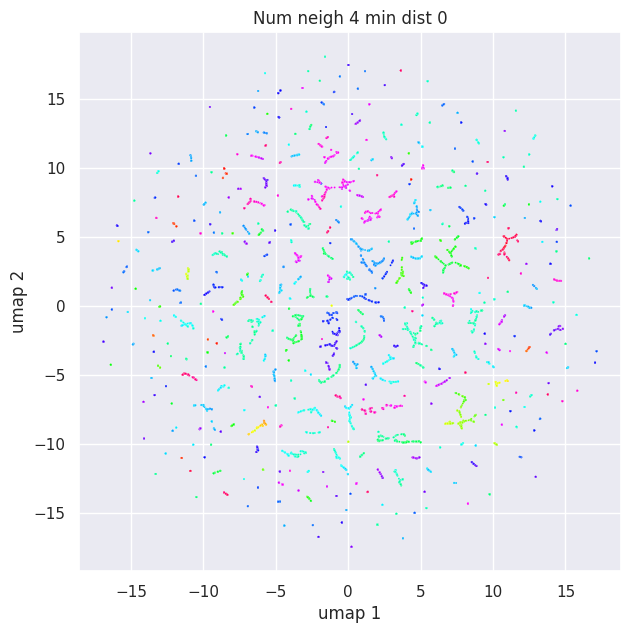

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


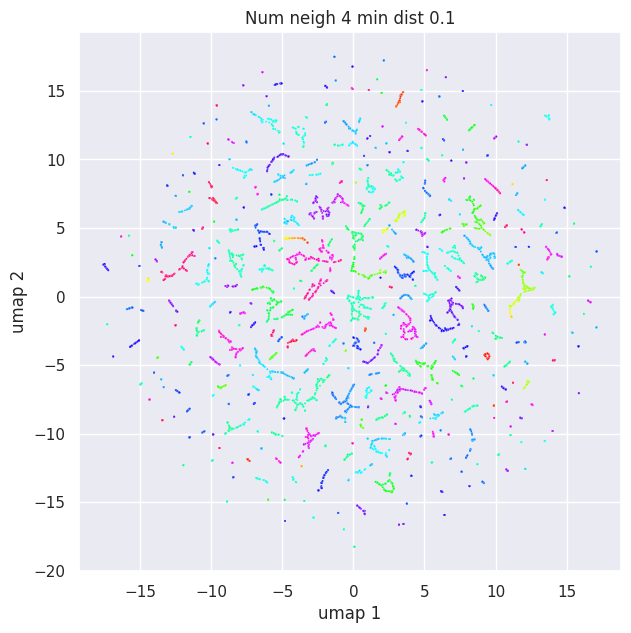

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


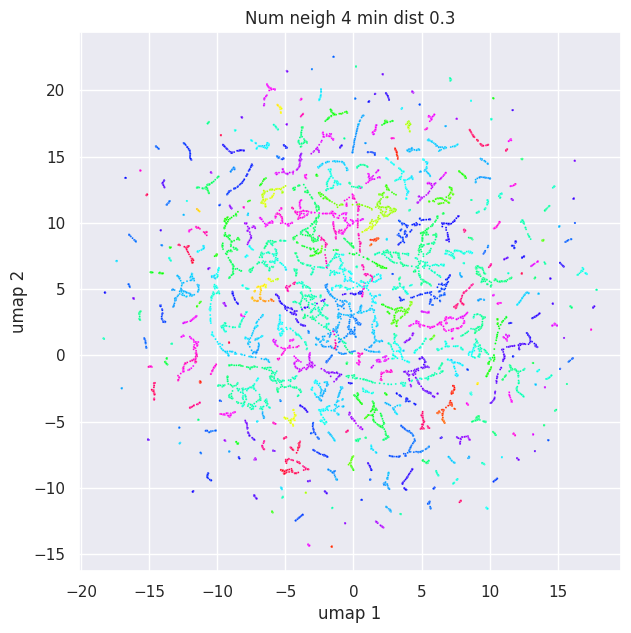

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


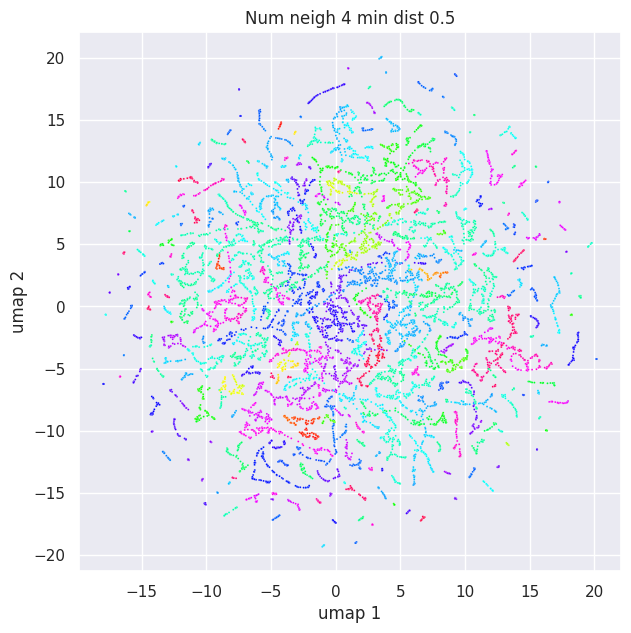

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


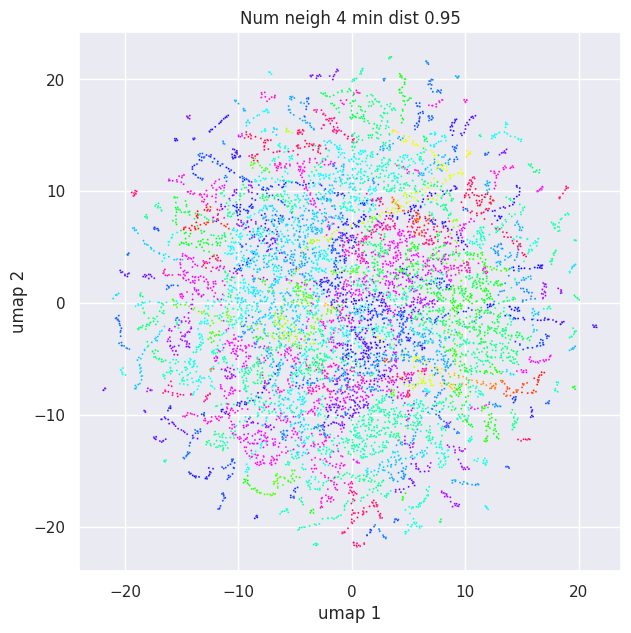

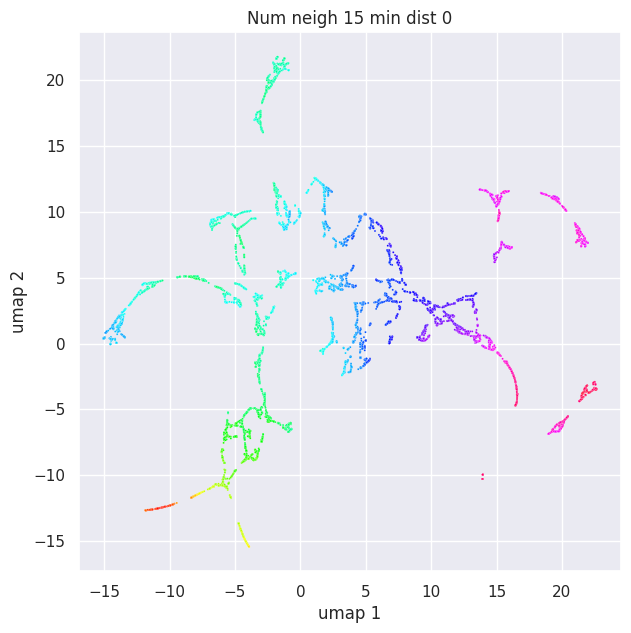

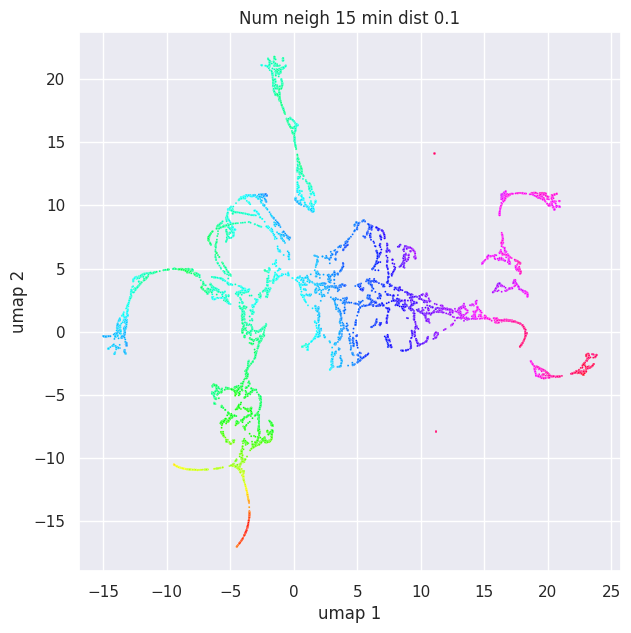

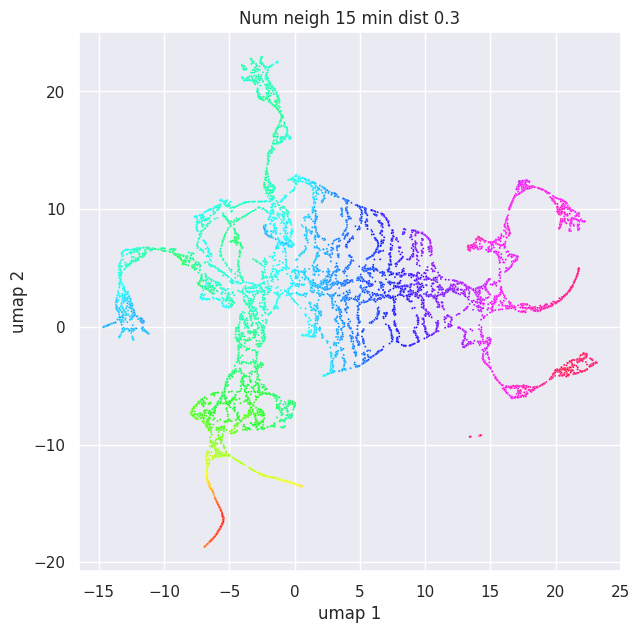

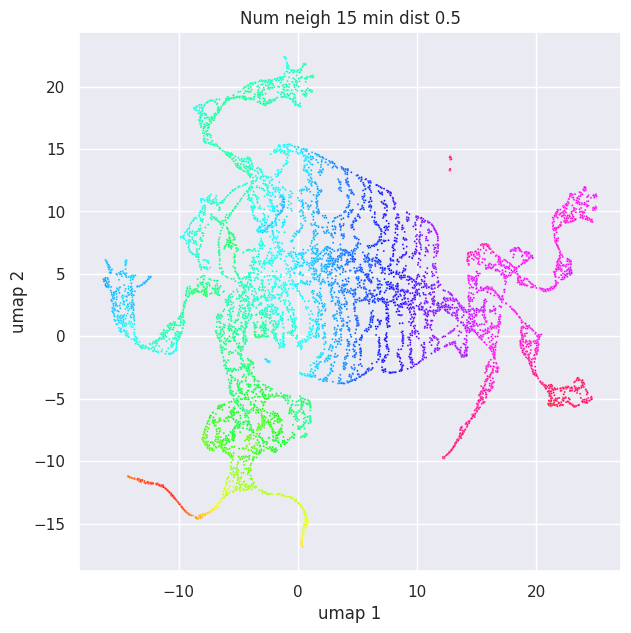

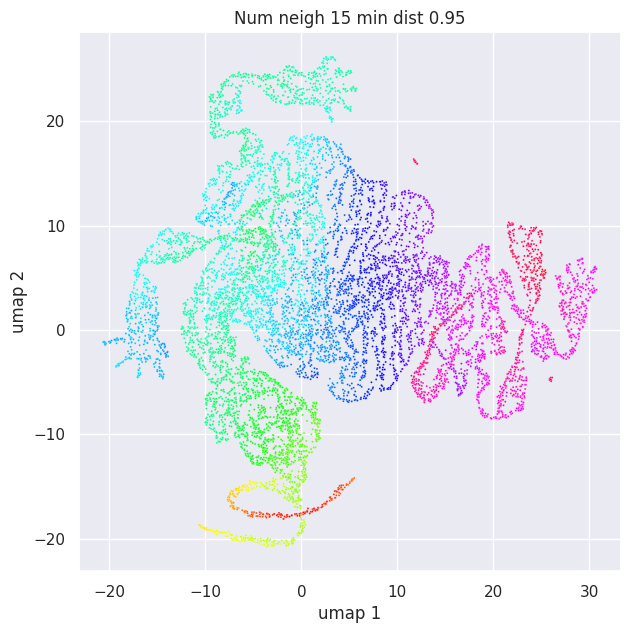

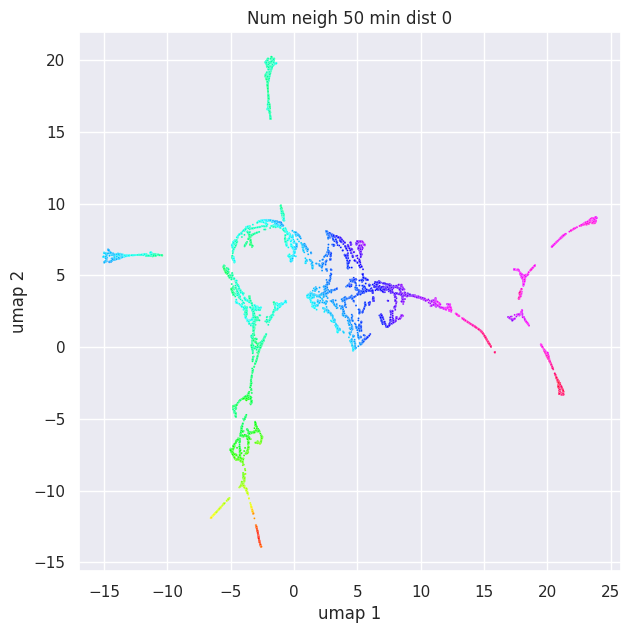

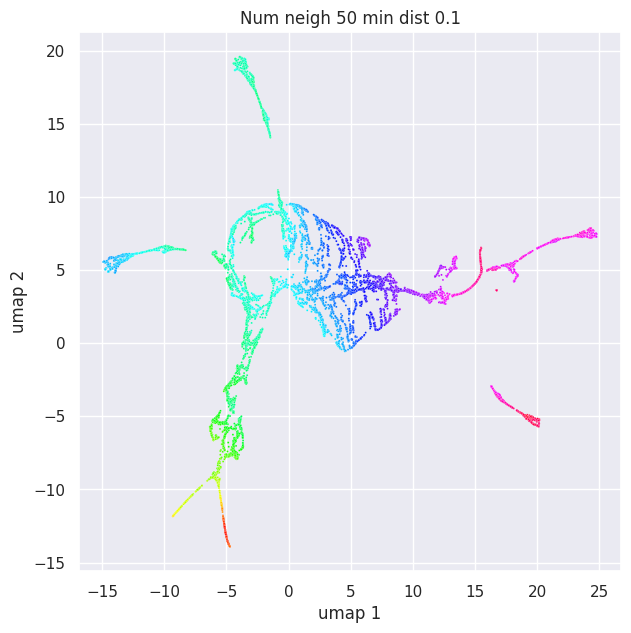

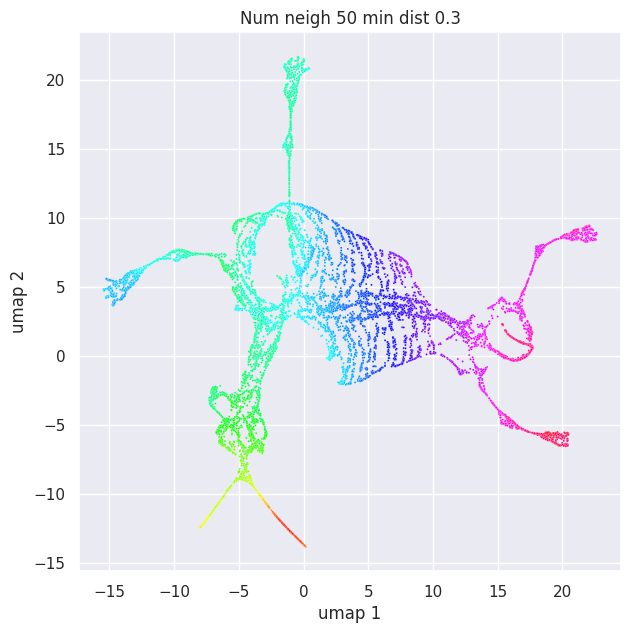

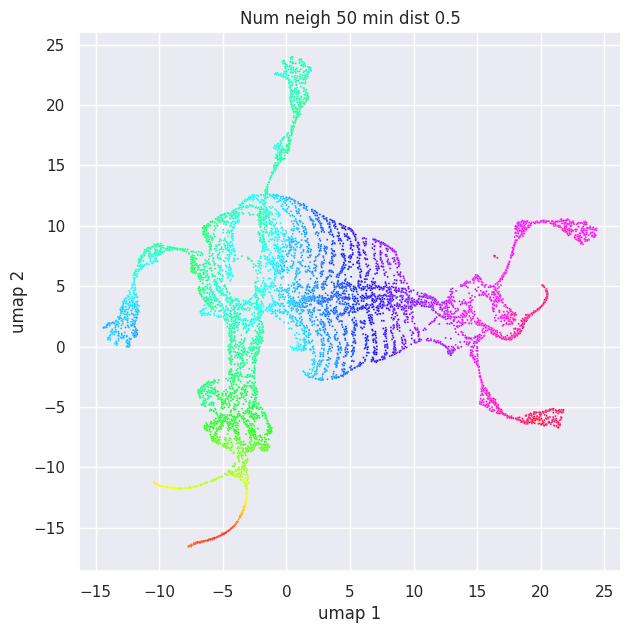

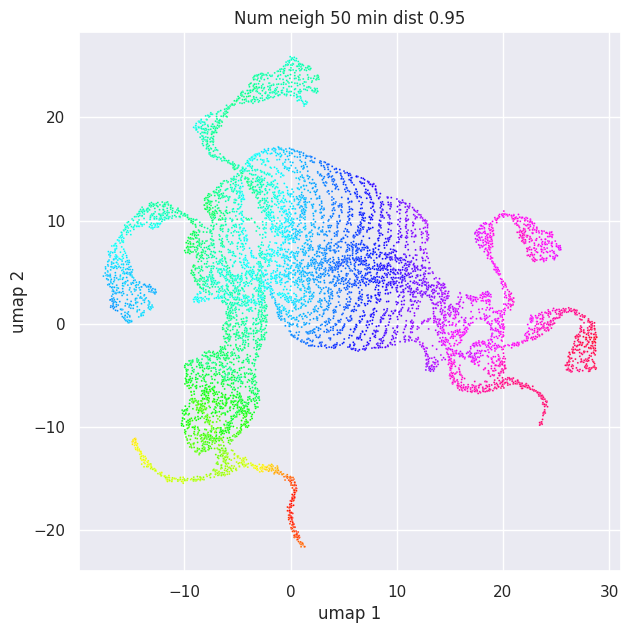

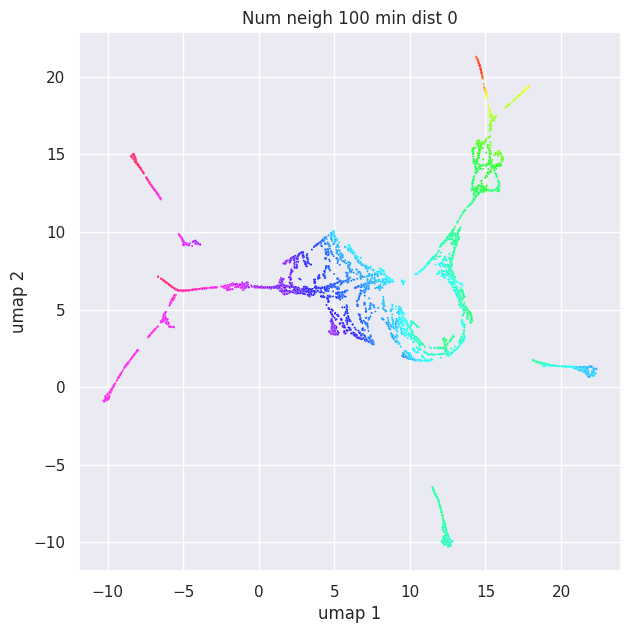

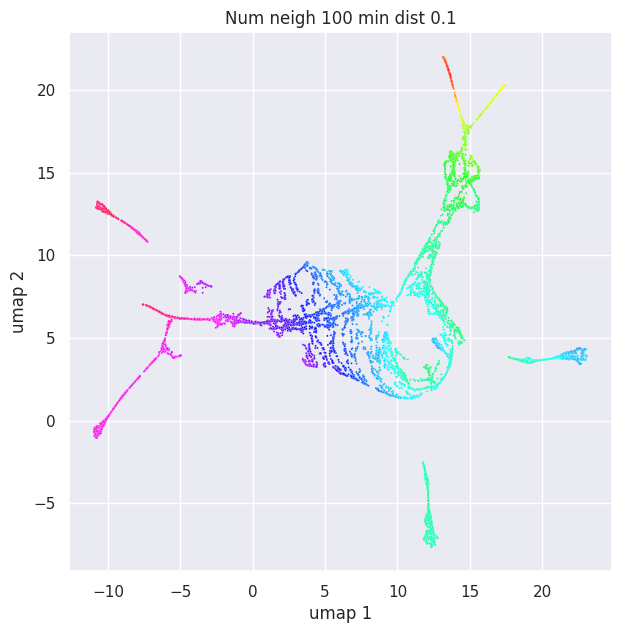

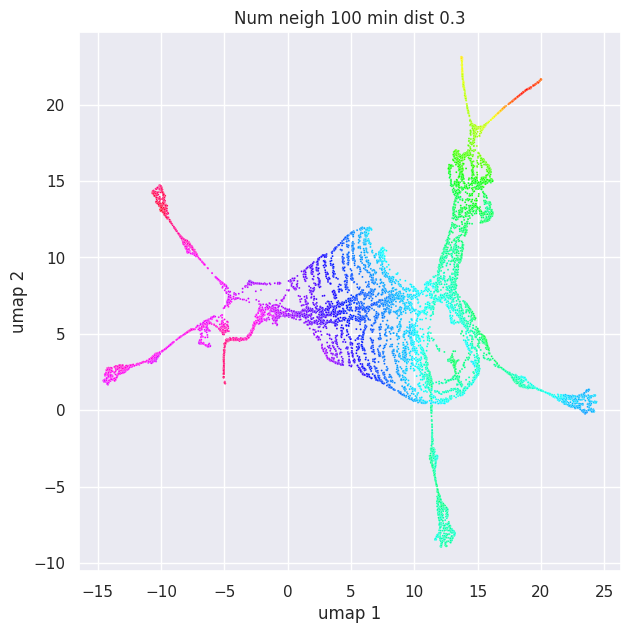

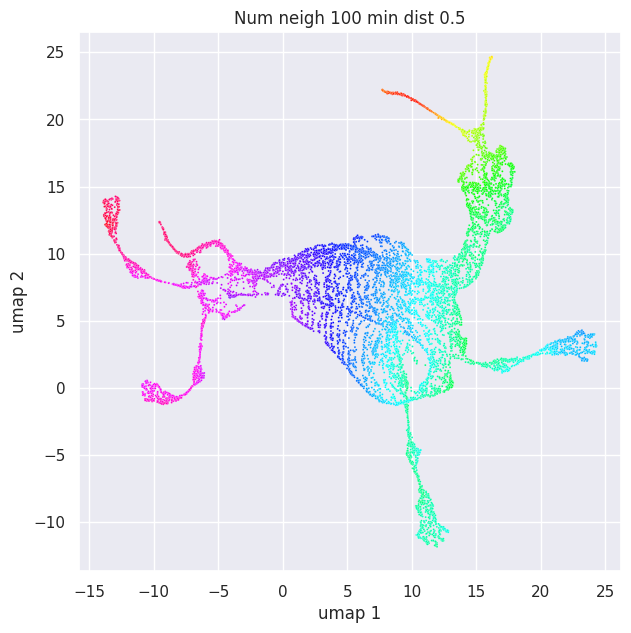

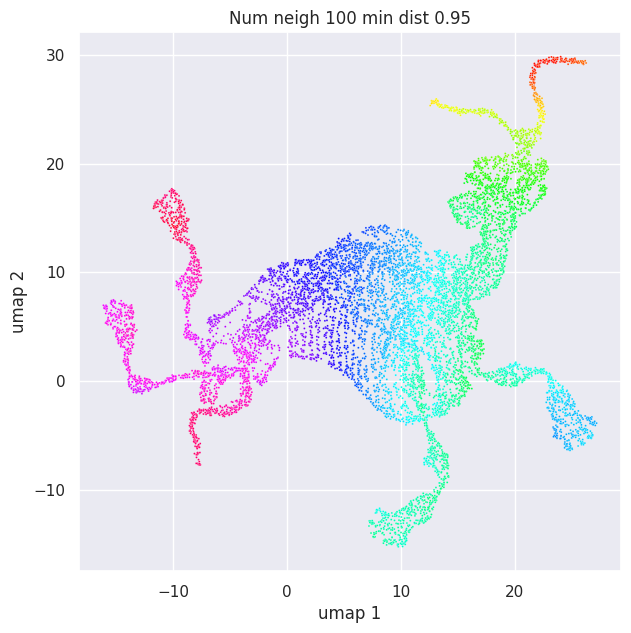

In [ ]:
for n_neighbors in [4, 15, 50, 100]:
    for min_dist in [0, 0.1, 0.3, 0.5, 0.95]:
        mnist_umap = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist)
        embedding = mnist_umap.fit_transform(df)

        mm_embedded = pd.DataFrame(embedding, columns=['umap 1', 'umap 2'])

        plt.figure(figsize=(7,7))
        sns.scatterplot(mm_embedded, x='umap 1', y='umap 2', color=colormap(norm), s=2)
        plt.title('Num neigh {} min dist {}'.format(n_neighbors, min_dist))
        plt.show()
# Num neigh 4: no global structure
#   as we increase min_dist, the embedding will be packed more loosely
# Num neigh 15: we can see the global structure
#   because min_dist is low, we are unable to see many of the details
#   as we increase min_dist, the plot becomes better, the embedding becomes more informative, we can see many details
# min_dist: 0.95: the embedding is now packed very loosely, it is hard to see some of the details